In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [51]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=90):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [3]:
 #urls = search_images('monkey photos', max_images=3)
 #urls[0]

In [52]:
#from fastdownload import download_url
#dest = 'monkey.jpg'
#download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
#im = Image.open(dest)
#im.to_thumb(256,256)

In [53]:
cloud_types = 'cirrus', 'cumulus', 'stratus', 'nimbus'
path = Path('clouds')
cloud_types


('cirrus', 'cumulus', 'stratus', 'nimbus')

In [56]:
if not path.exists():
    path.mkdir()
    for o in cloud_types:
        print(f'cloud type: {o}')
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images(f'{o} cloud photo')
        download_images(urls=list(results), dest=dest)

cloud type: cirrus
Searching for 'cirrus cloud photo'
cloud type: cumulus
Searching for 'cumulus cloud photo'
cloud type: stratus
Searching for 'stratus cloud photo'
cloud type: nimbus
Searching for 'nimbus cloud photo'


In [57]:
fns = get_image_files(path)
fns
!ls clouds
!cd clouds
!ls nimbus

#!rm -r clouds
!ls


cirrus	cumulus  nimbus  stratus
ls: cannot access 'nimbus': No such file or directory
clouds


In [58]:
failed = verify_images(fns)
failed

(#6) [Path('clouds/stratus/b74bff3e-1a5a-4aa9-ad0e-b553eeaaea0a.jpg'),Path('clouds/nimbus/6c595830-5a3d-463f-87f1-e5c8ce07788a.jpg'),Path('clouds/cirrus/3f126a42-dfd7-4452-966b-35160b66ce81.jpg'),Path('clouds/cirrus/751cdcb3-e9e2-48be-9a59-ced7fd852093.jpg'),Path('clouds/cirrus/2b97417a-a8f9-4cf1-96f6-20c5d5f996ad.jpg'),Path('clouds/cirrus/973980c4-5c72-47c5-85ad-f552c9637848.jpg')]

In [59]:
failed.map(Path.unlink);
!ls clouds/nimbus

007cece4-1c12-4da3-9bd2-b56959a4c036.jpg
039b8038-08c1-4a3f-b82b-3b22fe61fffe.jpg
0a7c2e85-6d35-49eb-ac71-4ddc9fc88d76.jpg
0a8f1d76-6166-4879-94e8-aff58a2e5c67.jpg
0f909bac-ea87-4728-b078-cb5e515bdcd9.jpg
10b9cff2-6acd-4a49-ba76-7abe4785f30f.jpg
1833373a-8e93-47b7-a49a-068e55f85983.jpg
1d0c31a0-8542-4f17-814c-ebfed285569f.jpg
1d6da947-651d-4ce4-af2f-056c2a8327ac.jpg
1da5e2b8-fe2e-471b-b936-44fd66950aa5.JPG
2c1d9b61-c490-4ee5-89fa-62c1d01e34ec.jpg
2dc3a068-9b3a-425f-9849-41edfd5cfd54.jpg
310ccba1-e61d-4f27-8262-2382446e9734.jpg
36796942-f982-4413-88eb-e339322e9698.jpg
37bc2df5-5750-46bb-840b-6669b970a889.jpeg
3974d1be-a782-4032-9b69-1d5bbf03e43b.jpg
3a9b31e2-1818-4256-8cab-840263eb7ae7.jpg
3bc937b3-5e8d-4355-b4b3-59ab6822a64f.jpg
45e7681e-2528-45f5-bae2-1a8f6fd41242.jpg
4ae75327-8839-4b79-92ae-ac78466dee8a.jpeg
4c134f91-02e0-4d3a-9190-8f8fa1c03ca7.jpg
554e8e95-fd18-44d6-84fb-808048a938bf.jpeg
568297fd-9817-4e0a-b12f-63233f13219f.jpg
58e86b04-5ec5-44c0-95cb-9d937c1cb243.jpg
5afc3969-1fde

In [60]:
clouds = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=20),
    get_y=parent_label,
    item_tfms=Resize(128))

In [61]:
dls = clouds.dataloaders(path)

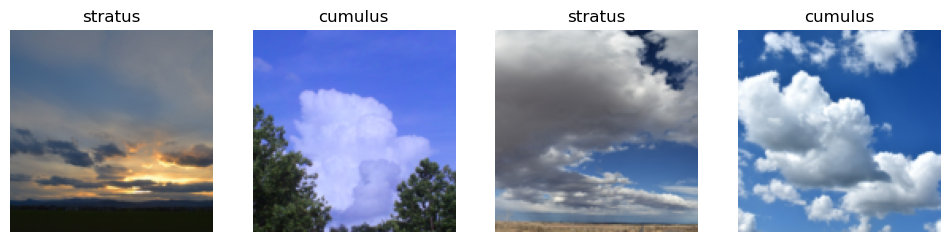

In [62]:
dls.valid.show_batch(max_n=4, nrows=1)


In [63]:
clouds = clouds.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = clouds.dataloaders(path)

In [68]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,2.053706,1.264335,0.514706,01:02


epoch,train_loss,valid_loss,error_rate,time
0,1.415994,0.993053,0.426471,01:21
1,1.363356,1.023703,0.352941,01:20
2,1.171958,1.061078,0.382353,01:08
3,1.054739,1.010691,0.367647,00:53
4,0.984519,0.992450,0.323529,00:53
5,0.925780,0.987315,0.294118,00:52


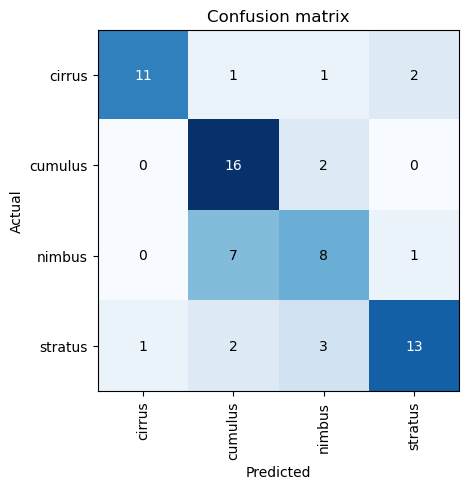

In [69]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

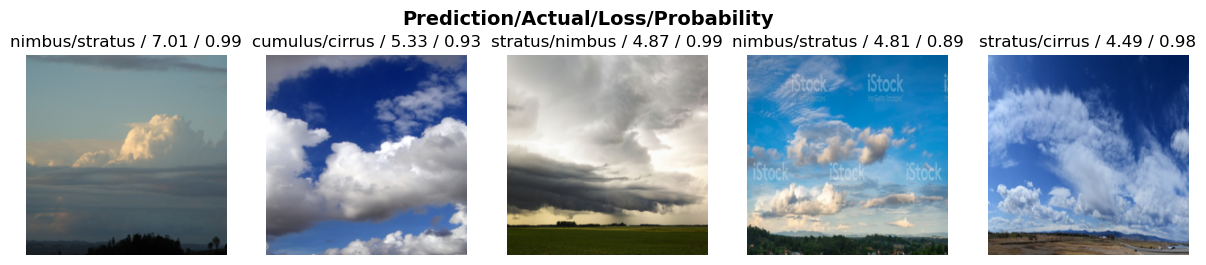

In [70]:
interp.plot_top_losses(5, nrows=1)


In [67]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
# delete selected for deletion
cleaner.delete()
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# move images for which we've selected a different category
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
